In [1]:
%reload_ext autoreload
%autoreload 2
from src.utils import oversample
from src.utils import train_eval_pytorch_model
from sklearn.model_selection import train_test_split
from src.models.cnn import *
from torch import tensor
import torch

In [2]:
%%capture
from src.preprocessors.dasps import DaspsPreprocessor

trials = DaspsPreprocessor.get_trials(duration=2, autoreject=False)

In [3]:
oversampled_trials = oversample(trials)
oversampled_trials.shape

(4524,)

256
torch.Size([1, 14, 256])
torch.Size([1, 1, 14, 256])
Train samples:  3619
Test samples:  905


/var/folders/wg/8xzwtj0n6fd93r4pqlr_bv1c0000gn/T/ipykernel_69120/3092932848.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = tensor(data, dtype=torch.float32)


  0%|          | 0/30 [00:00<?, ?it/s]

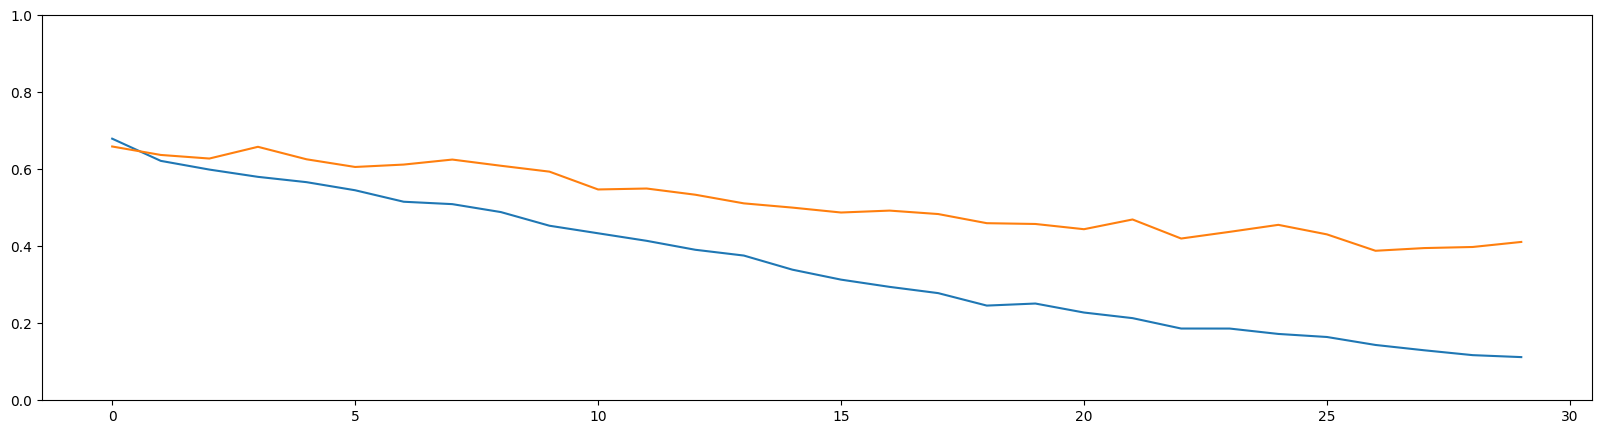

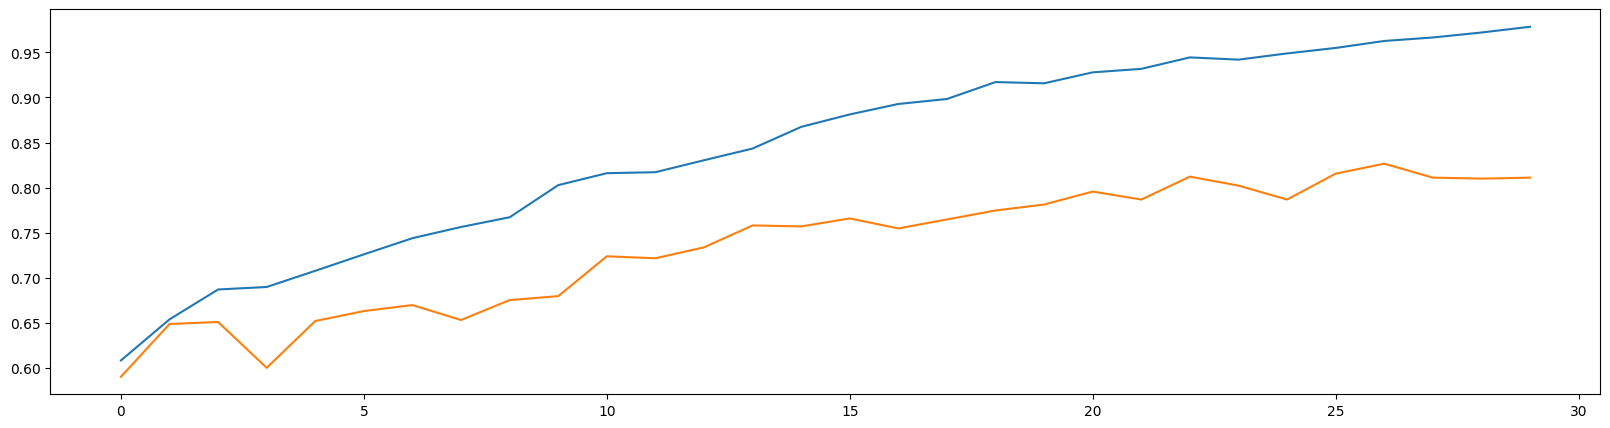

Avg test acc last 10 epochs:  0.8057459


In [6]:
seq_len = trials[0].epoch.get_data().shape[2]

trials_train, trials_test = train_test_split(oversampled_trials, train_size=0.8)

train_dataset = DeepCnnDataset(trials_train, seq_len)
test_dataset = DeepCnnDataset(trials_test, seq_len)

print(seq_len)
print(train_dataset[0][0].shape)

model = ConvNet(seq_len, 2, dropout=0.2)

data = train_dataset[0][0].unsqueeze(0)
print(data.shape)
data = tensor(data, dtype=torch.float32)
model.forward(data)

train_eval_pytorch_model(model, train_dataset, test_dataset, num_epochs=30, learning_rate=0.0001)